In [232]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Loading the dataset

In [233]:
data = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv")
data.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [234]:
data.head(20)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


count of rows and columns

In [235]:
data.shape

(1371980, 7)

 Customers data description:


**customer_id` : A unique identifier of every customer
`FN` : 1 or NaN (Binary feature) --FN status
`Active` : 1 or NaN (Binary feature) -- Members active for further communication and respond to feedbacks
`club_member_status` : Status in club 
`fashion_news_frequency` : H&M news frequency 
`age`  : Customers age
`postal_code` : Postal code of customer

In [236]:
data.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [237]:
data_backup = data.copy()
data[['FN','Active']] = data[['FN','Active']].fillna(0)

In [238]:
data.isna().sum()

customer_id                   0
FN                            0
Active                        0
club_member_status         6062
fashion_news_frequency    16009
age                       15861
postal_code                   0
dtype: int64

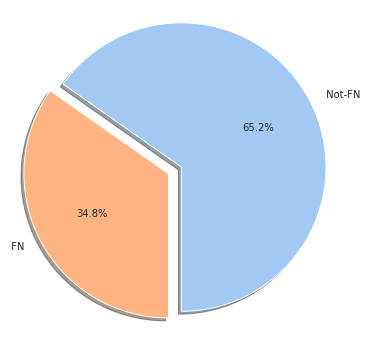

In [239]:
fig, ax = plt.subplots(figsize=(6,6))
colors = sns.color_palette('pastel')
e = (0.1, 0)
ax.pie(data['FN'].value_counts(), explode=e, labels=[' Not-FN ',' FN '],
       autopct='%1.1f%%',shadow=True, startangle=270, colors=colors)
ax.axis('equal')
plt.show()

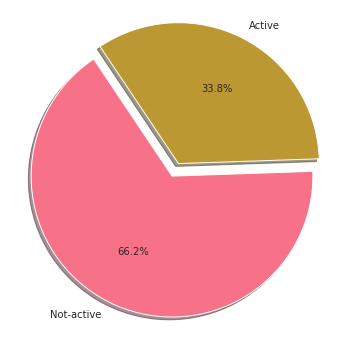

In [240]:
fig, ax = plt.subplots(figsize=(6,6))
colors = sns.color_palette('husl')
e = (0, 0.1)
ax.pie(data['Active'].value_counts(), explode=e, labels=['Not-active','Active'],
       autopct='%1.1f%%',shadow=True, startangle=123.8, colors=colors)
ax.axis('equal')
plt.show()

In [241]:
data['age'].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

In [242]:
data['FN'].unique()

array([0., 1.])

In [243]:
data['Active'].unique()

array([0., 1.])

In [244]:
data['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

In [245]:
data['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [246]:
data['age'].unique()

array([49., 25., 24., 54., 52., nan, 20., 32., 29., 31., 56., 75., 41.,
       27., 30., 48., 35., 22., 40., 38., 45., 68., 55., 19., 60., 44.,
       21., 26., 28., 53., 33., 17., 23., 51., 18., 34., 57., 47., 70.,
       50., 63., 58., 43., 67., 72., 42., 39., 79., 71., 59., 36., 62.,
       37., 46., 73., 64., 74., 61., 85., 69., 76., 66., 65., 82., 16.,
       90., 80., 78., 81., 84., 77., 97., 89., 83., 98., 88., 86., 87.,
       93., 91., 99., 96., 94., 92., 95.])

In [247]:
data['postal_code'].unique()

array(['52043ee2162cf5aa7ee79974281641c6f11a68d276429a91f8ca0d4b6efa8100',
       '2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93f4c830291c32bc3057',
       '64f17e6a330a85798e4998f62d0930d14db8db1c054af6c9090f7dd3e38380dc',
       ...,
       'c9d6890a6a194925f2c7712bde35b4ea973971cbe27c993ee907fe6d97a3ab0c',
       'c9e32043e0338a51dfd94705cfd8f75eb98c2ec34730497c9726b21e59ee4572',
       '0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d'],
      dtype=object)

In [248]:
pie_data = data[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

In [249]:
pie_data

,customer_id
fashion_news_frequency,
Monthly,842
NONE,877711
None,2
Regularly,477416


In [250]:
postal_data = data[['customer_id', 'postal_code']].groupby('postal_code').count()

In [251]:
postal_data

,customer_id
postal_code,
0000198d2c593b7d3df5a35282b74cf3a487b066286b2beab55d4f5ac2b16127,1
00005652fb5323679a5d608ce8c94fbb57bc15d3d8c01acceef496d347bfdea2,2
0000eda740da878fb9df474806be9597f043eb5f748091f0d31f030ab7a9515d,1
0001617618d0facf2ae73cdba7b8caefb3c05e6987a98ac5584c92b511b3ce93,1
00016f13cb796865b053cda4d470b4a3146553eaa3624164ab6767214030b4c5,7
...,...
ffffcc2ddf5fbe05ea3e2bdb5f920237c5167862fa906a5f4e9363e5aeaa4aa1,6
ffffd89fe6a23128efcee162ad22b229e0c7e3d9bba5a34aed6a2c481f797ac0,1
ffffdad63acd760f392e724af1e8fe05984ebef3749edec3d1bdc9b639367908,3


In [252]:
age_postal_data = data[['postal_code', 'age']].groupby('age').count()

In [253]:
age_postal_data

,postal_code
age,
16.0,161
17.0,9392
18.0,24323
19.0,37707
20.0,55196
...,...
95.0,10
96.0,3
97.0,4


In [254]:
print(f'data.shape[0]: {data.shape[0]}')

data.shape[0]: 1371980


In [255]:
data.shape[0] - data['customer_id'].nunique()

0

In [256]:
data['club_member_status'].unique()
data[['customer_id', 'club_member_status']].groupby('club_member_status').count()

,customer_id
club_member_status,
ACTIVE,1272491
LEFT CLUB,467
PRE-CREATE,92960


In [257]:
data['club_member_status'].describe()

count     1365918
unique          3
top        ACTIVE
freq      1272491
Name: club_member_status, dtype: object

### How many active customers

In [258]:
data.loc[(data['club_member_status'] == 'ACTIVE')].shape[0]

1272491

### Age group of customers

In [259]:

data['age'].mean()

36.386964565794

In [260]:
data['age'].max()

99.0

Below grraph gives age distribution of the customers

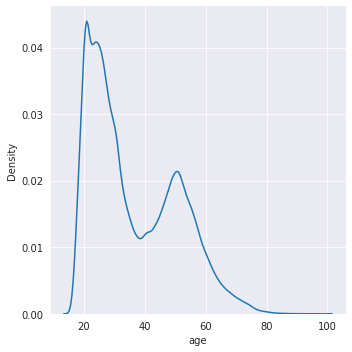

In [261]:
#data['age'].plot(kind='kde', figsize=(14,6))
sns.displot(data, x="age", kind="kde")

bimodal

<AxesSubplot:>

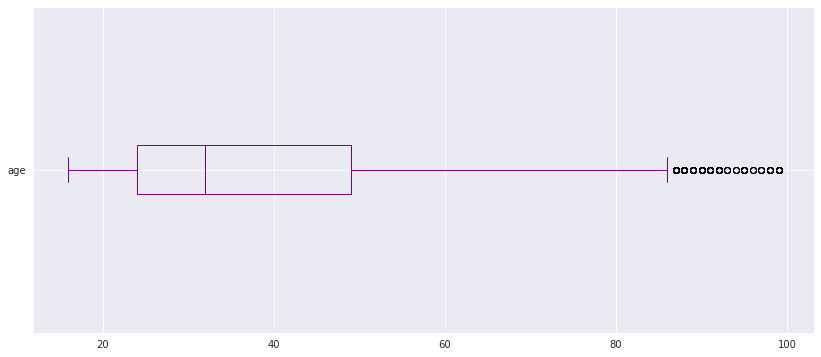

In [262]:
data['age'].plot(kind='box', vert=False, color= 'Purple',figsize=(14,6))

### Clustering by postal code

In [263]:
data_postal = data.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,120303,120303,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,261,261,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,159,159,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,157,157,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,156,156,156,156,155
...,...,...,...,...,...,...,...
129744,5e14f1b9db2fc96d22ed0a48462e684061ee81ab82b36e...,1,1,1,1,1,1
271330,c4873af1061bd5be842d810d9d8549941befa4f4aaf56a...,1,1,1,1,1,1
129746,5e153c2cb31cce8575346a7b165527a58d49d5223cfd64...,1,1,1,1,0,1
271328,c48723f620fb40095368752f0dc577b5575dea418bea6e...,1,1,1,1,1,1


In [264]:
data_postal.iloc[0:1, 0:1].values.tolist()

[['2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c']]

In [265]:
61034 in data_postal.index

True

In [266]:
data_postal.loc[61034] #.values.tolist()

postal_code               2c29ae653a9282cce4151bd87643c907644e09541abc28...
customer_id                                                          120303
FN                                                                   120303
Active                                                               120303
club_member_status                                                   118281
fashion_news_frequency                                               114377
age                                                                  118002
Name: 61034, dtype: object

In [267]:
data['postal_code'].value_counts()

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
16dd7e391f305b54c01ffed87c189e33de83158d0a808d1b346222703742f638         1
5ce1c699380b3c13655347c9636043f5e64ec2538a1ee7d42dd253a584577630         1
afdedc642d01efeefec6fc8d3394724a71888ebd0ff0311eff6f34946589479d         1
4c8838d278d23029c920b9684fa4cf30a532428a445afb300eeb288685cf00e1         1
0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d         1
Name: postal_code, Length: 352899, dtype: int64

In [268]:
data['postal_code'].value_counts().head(1)

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
Name: postal_code, dtype: int64

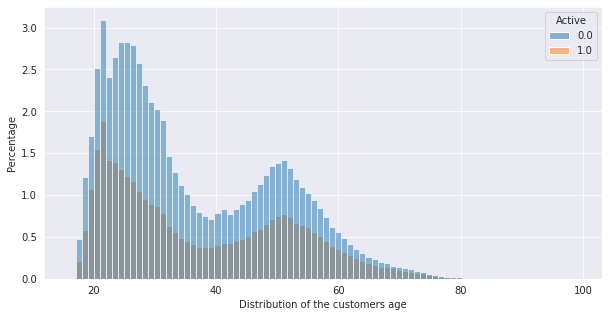

In [269]:
fig, ax = plt.subplots(figsize=(10,5))
bins =data['age'].nunique()
ax = sns.histplot(data=data, x='age', bins=bins ,hue='Active',  stat="percent")
ax.set_ylabel('Percentage')
ax.set_xlabel('Distribution of the customers age')
plt.show()

In [270]:
active_age_ratio = data.groupby('age')['Active'].value_counts(normalize=True).mul(100)
active_age_ratio = active_age_ratio.rename('Active_ratio', inplace=True).reset_index()
active_age_ratio = active_age_ratio[active_age_ratio['Active']==1]
active_age_ratio['Active'] = active_age_ratio['Active'].astype(int)
active_age_ratio['Age'] = active_age_ratio['age'].astype(int)

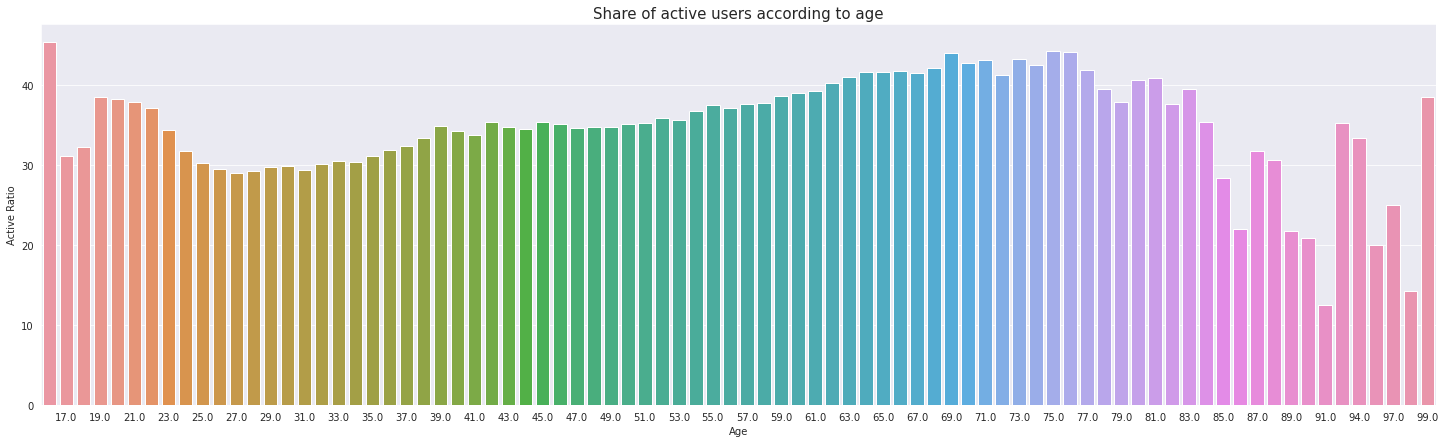

In [271]:
fig, ax = plt.subplots(figsize=(25,7))
sns.barplot(x='age', y='Active_ratio', data=active_age_ratio)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)    
ax.set_title("Share of active users according to age", fontsize=15)
ax.set_ylabel("Active Ratio")
ax.set_xlabel("Age")
plt.show()

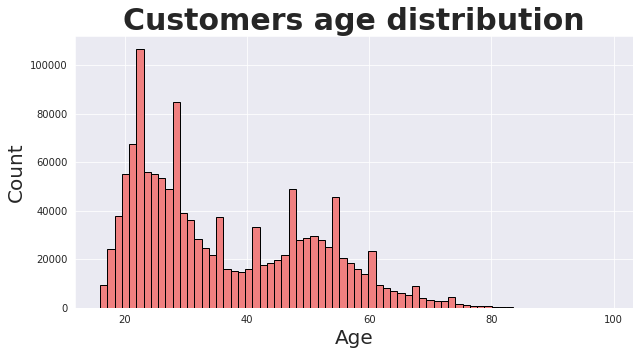

In [272]:
plt.figure(figsize=(10,5))
plt.title("Customers age distribution", fontweight="bold", size=30)
plt.hist(data["age"], bins=70, edgecolor="black", color="#F08080")
plt.xlabel("Age",size=20)
plt.ylabel("Count", size=20)
plt.show()

In [273]:
data['age_groups'] = pd.cut(data['age'], bins=[16, 20, 30, 40,50, 60, 70, float('Inf')], labels=['16-20', '20-30','30-40','40-50','50-60','60-70' , '70+'])

In [274]:
data['age_groups']

0          40-50
1          20-30
2          20-30
3          50-60
4          50-60
           ...  
1371975    20-30
1371976    20-30
1371977    20-30
1371978    16-20
1371979    60-70
Name: age_groups, Length: 1371980, dtype: category
Categories (7, object): ['16-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70+']

In [275]:
data['age']

0          49.0
1          25.0
2          24.0
3          54.0
4          52.0
           ... 
1371975    24.0
1371976    21.0
1371977    21.0
1371978    18.0
1371979    65.0
Name: age, Length: 1371980, dtype: float64

In [276]:
x, y = 'age_groups', 'fashion_news_frequency'
df_age_news = data.groupby(x)[y].value_counts(normalize=True)
df_age_news = df_age_news.mul(100)
df_age_news = df_age_news.rename('percent(%)').reset_index()
df_age_news = df_age_news[df_age_news["fashion_news_frequency"].isin(["Regularly","NONE"])]


Below plot gives the percentage of customers belonging to different age groups who are regular subscribers of the fashion news and who have not subscribed to our fashion news

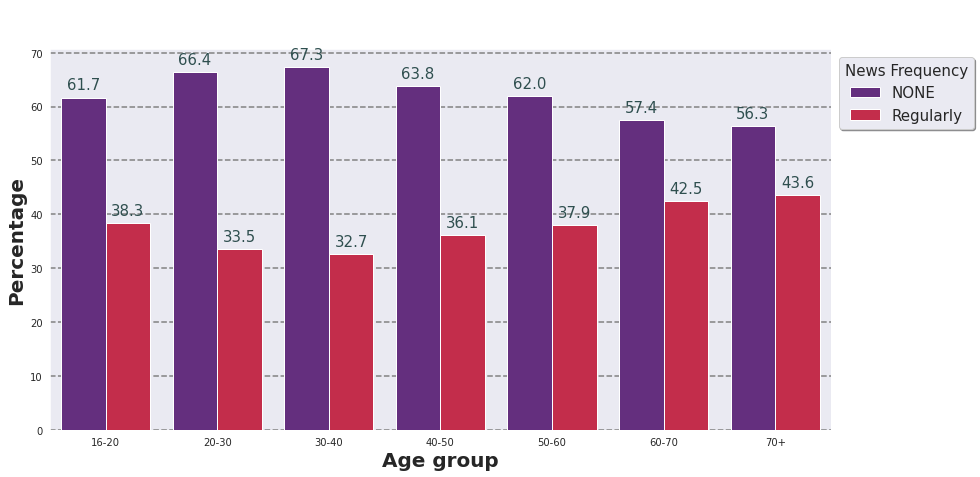

In [277]:
palette1 = {"Regularly":'crimson', "NONE":'#68228B'}
plt.figure(figsize=(14,7))
plt.title("\n",fontweight="bold", size=20)
g=sns.barplot(x="age_groups", y="percent(%)",data=df_age_news, hue="fashion_news_frequency", palette=palette1)
plt.xlabel("Age group",fontweight="bold", size=20)
plt.ylabel("Percentage",fontweight="bold", size=20)
for container in g.containers:
    g.bar_label(container, padding = 5, fmt='%.1f', fontsize=15, color="darkslategray")
plt.grid(axis="y",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.legend(title='News Frequency',bbox_to_anchor=(1.0, 1.0), ncol=1, fancybox=True, shadow=True, fontsize=15,title_fontsize=15)
plt.show()

In [278]:
data["club_member_status"].value_counts(normalize=True)

ACTIVE        0.931601
PRE-CREATE    0.068057
LEFT CLUB     0.000342
Name: club_member_status, dtype: float64

Above, it can be seen that approximately 93% of the customers belong to ACTIVE club member status
6.8% of the customers belong to PRE-CREATE club member status
0.3% of the customers belong to LEFT CLUB club member status

<AxesSubplot:>

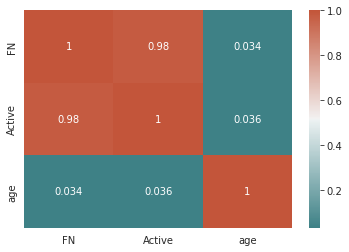

In [279]:
corr = data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

below plot for distribution of the customers belonging to different club member status

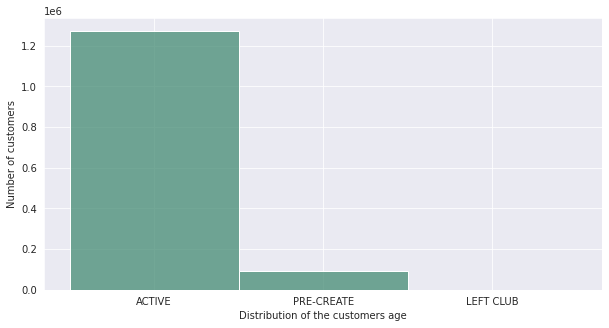

In [280]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=data, x='club_member_status', bins=50, color='#458B74')
ax.set_xlabel('Distribution of the customers age')
ax.set_ylabel('Number of customers')
plt.show()

below plot for distribution of the customers age who have subscribed for regular fashion news frequency

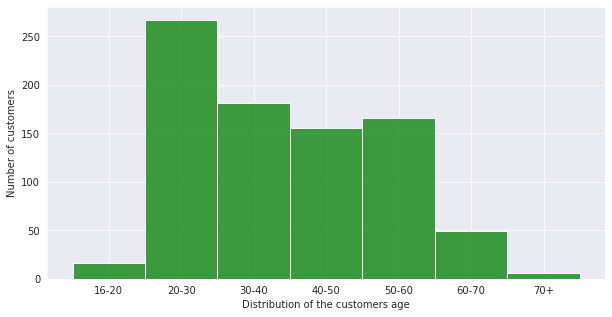

In [281]:
temp = data['fashion_news_frequency'] == 'Monthly'
temp = data[temp]
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=temp, x='age_groups', bins=50, color='green')
ax.set_xlabel('Distribution of the customers age')
ax.set_ylabel('Number of customers')
plt.show()

below plot for distribution of the customers age who have subscribed for regular fashion news frequency 

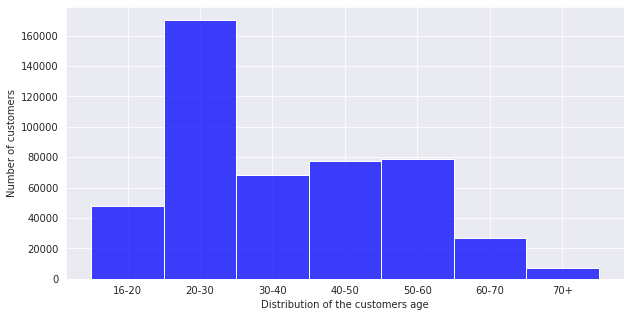

In [282]:
temp = data['fashion_news_frequency'] == 'Regularly'
temp = data[temp]
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=temp, x='age_groups', bins=50, color='blue')
ax.set_xlabel('Distribution of the customers age')
ax.set_ylabel('Number of customers')
plt.show()

References:
https://seaborn.pydata.org/
https://matplotlib.org/
https://numpy.org/
https://pandas.pydata.org/
https://www.kaggle.com/code/morecoding/introeda/notebook
https://www.kaggle.com/code/morecoding/datapreprocessing/notebook
https://matplotlib.org/stable/plot_types/index.html